In [1]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### Importing data
a) Customer           
b) Transaction                
c) Product Heirarchy

In [2]:
file_path='D:/Academics/Data Science/AnalytixLabs/Python/Case Studies/Python Foundation Case Study 1 - Retail Case Study/'
customer = pd.read_csv( file_path + 'Customer.csv')
transaction = pd.read_csv( file_path + 'Transactions.csv')
prod_cat_info = pd.read_csv( file_path + 'prod_cat_info.csv')

##### Understanding the data:

In [3]:
customer.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [4]:
customer.info()
# 'Gender' & 'city_code' columns have 2 NA's 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [5]:
transaction.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


In [6]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [7]:
prod_cat_info.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [8]:
prod_cat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


### Exploratory Data Analysis
#### Changing data type of date columns to proper format

In [9]:
customer.DOB = pd.to_datetime(customer.DOB, format='%d-%m-%Y')

In [10]:
transaction.tran_date = transaction.tran_date.str.replace(pat='/', repl='-')
transaction.tran_date = pd.to_datetime(transaction.tran_date , format='%d-%m-%Y')

#### Checking for duplicate entries in data

In [11]:
customer.duplicated().sum()
# no duplicates

0

In [12]:
prod_cat_info.duplicated().sum()
# no duplicates

0

In [13]:
# checking for duplicate entries in transactions table ignoring the 'tran_date' column
transaction.duplicated(subset=transaction.columns[transaction.columns != 'tran_date']).sum()

118

In [14]:
# sorting the transactions table in descending order of 'tran_date' to keep the latest transaction on top
transaction.sort_values(by='tran_date', ascending=False, inplace=True)

# keeping the duplicate transaction row with latest transaction date and discarding older records
transaction = transaction.drop_duplicates(subset = transaction.columns[transaction.columns != 'tran_date'],
                                          keep='first')

In [15]:
transaction.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop


### 1) Merging the dataset

In [16]:
Customer_Final = pd.merge(left = transaction,
                          right = customer,
                          how = 'inner',
                          left_on = 'cust_id',
                          right_on = 'customer_Id')

Customer_Final = pd.merge(left = Customer_Final,
                          right = prod_cat_info,
                          how = 'inner',
                          left_on = ['prod_cat_code' , 'prod_subcat_code'],
                          right_on = ['prod_cat_code' , 'prod_sub_cat_code'])

In [17]:
Customer_Final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women
1,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women
2,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,271509,1981-06-08,M,3.0,Clothing,1,Women
3,92814475704,267750,2013-08-16,1,1,-4,-284,119.280,-1255.280,Flagship store,267750,1986-10-13,M,1.0,Clothing,1,Women
4,92814475704,267750,2013-08-07,1,1,4,284,119.280,1255.280,Flagship store,267750,1986-10-13,M,1.0,Clothing,1,Women


### 2. Prepare a summary report for the merged dataset
### a) Get the column names and their corresponding data types

In [18]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22935 entries, 0 to 22934
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     22935 non-null  int64         
 1   cust_id            22935 non-null  int64         
 2   tran_date          22935 non-null  datetime64[ns]
 3   prod_subcat_code   22935 non-null  int64         
 4   prod_cat_code      22935 non-null  int64         
 5   Qty                22935 non-null  int64         
 6   Rate               22935 non-null  int64         
 7   Tax                22935 non-null  float64       
 8   total_amt          22935 non-null  float64       
 9   Store_type         22935 non-null  object        
 10  customer_Id        22935 non-null  int64         
 11  DOB                22935 non-null  datetime64[ns]
 12  Gender             22926 non-null  object        
 13  city_code          22927 non-null  float64       
 14  prod_c

#### b) Top/Bottom 10 observations

In [19]:
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women
1,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women
2,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,271509,1981-06-08,M,3.0,Clothing,1,Women
3,92814475704,267750,2013-08-16,1,1,-4,-284,119.280,-1255.280,Flagship store,267750,1986-10-13,M,1.0,Clothing,1,Women
4,92814475704,267750,2013-08-07,1,1,4,284,119.280,1255.280,Flagship store,267750,1986-10-13,M,1.0,Clothing,1,Women
5,4737317330,269345,2011-07-29,1,1,5,1141,599.025,6304.025,MBR,269345,1970-06-26,F,10.0,Clothing,1,Women
6,90501340928,271817,2012-02-19,1,1,1,1122,117.810,1239.810,TeleShop,271817,1989-12-24,M,8.0,Clothing,1,Women
7,35030444164,268129,2011-11-18,1,1,5,1047,549.675,5784.675,MBR,268129,1982-08-07,F,9.0,Clothing,1,Women
8,99335419136,268755,2012-12-13,1,1,3,1181,372.015,3915.015,e-Shop,268755,1984-07-15,F,8.0,Clothing,1,Women
9,44425889101,274987,2012-03-18,1,1,4,897,376.740,3964.740,Flagship store,274987,1983-10-08,M,2.0,Clothing,1,Women


In [20]:
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
22925,80394789005,270102,2011-08-05,10,6,1,687,72.135,759.135,TeleShop,270102,1981-11-03,M,7.0,Home and kitchen,10,Kitchen
22926,10097970933,268287,2011-06-26,10,6,2,261,54.810,576.810,TeleShop,268287,1979-02-01,M,2.0,Home and kitchen,10,Kitchen
22927,61518095737,268287,2011-05-10,10,6,3,611,192.465,2025.465,e-Shop,268287,1979-02-01,M,2.0,Home and kitchen,10,Kitchen
22928,58258824183,272877,2011-02-08,10,6,5,95,49.875,524.875,e-Shop,272877,1989-08-22,F,5.0,Home and kitchen,10,Kitchen
22929,38432487071,270837,2011-06-13,10,6,2,1009,211.890,2229.890,Flagship store,270837,1990-01-09,F,8.0,Home and kitchen,10,Kitchen
22930,60156894486,272374,2011-05-20,10,6,3,691,217.665,2290.665,TeleShop,272374,1990-06-09,F,8.0,Home and kitchen,10,Kitchen
22931,11626435009,269610,2011-04-21,10,6,-3,-996,313.740,-3301.740,e-Shop,269610,1977-11-11,M,2.0,Home and kitchen,10,Kitchen
22932,11626435009,269610,2011-04-17,10,6,3,996,313.740,3301.740,e-Shop,269610,1977-11-11,M,2.0,Home and kitchen,10,Kitchen
22933,40760855337,268517,2011-03-31,10,6,5,503,264.075,2779.075,Flagship store,268517,1976-12-27,F,4.0,Home and kitchen,10,Kitchen
22934,20417144530,269556,2011-01-29,10,6,3,654,206.010,2168.010,Flagship store,269556,1972-12-27,M,5.0,Home and kitchen,10,Kitchen


#### c) Five number summary for continuous variables (min, Q1, mean, Q3, max)

In [21]:
def cont_summ(x):
    minimum = x.min()
    maximum = x.max()
    average = round(x.mean(), 2)
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    return(pd.Series(data=[minimum, Q1, average, Q3, maximum],
                    index=['Minimum', 'First_quartile', 'Average', 'Third_quartile', 'Maximum']))

cont_var = ['Qty', 'Rate', 'Tax', 'total_amt']
Customer_Final.loc[:, cont_var].apply(cont_summ)

,Qty,Rate,Tax,total_amt
Minimum,-5.00,-1499.00,7.35,-8270.925
First_quartile,1.00,318.00,98.28,777.920
Average,2.46,643.79,248.62,2132.160
Third_quartile,4.00,1111.00,365.40,3584.620
Maximum,5.00,1500.00,787.50,8287.500


#### d) Frequency tables for all the categorical variables

In [22]:
def freq_tab(x) :
    print(x.value_counts().sort_index())
    print('\n')

categ_var = [ 'Gender' , 'Store_type' , 'city_code' ,
             'prod_cat_code' , 'prod_cat' , 'prod_subcat_code' , 'prod_subcat']
Customer_Final.loc[:,categ_var].apply(freq_tab)

F    11176
M    11750
Name: Gender, dtype: int64


Flagship store    4552
MBR               4640
TeleShop          4479
e-Shop            9264
Name: Store_type, dtype: int64


1.0     2246
2.0     2262
3.0     2400
4.0     2415
5.0     2347
6.0     2118
7.0     2339
8.0     2313
9.0     2164
10.0    2323
Name: city_code, dtype: int64


1    2946
2    2980
3    4878
4    1985
5    6039
6    4107
Name: prod_cat_code, dtype: int64


Bags                1985
Books               6039
Clothing            2946
Electronics         4878
Footwear            2980
Home and kitchen    4107
Name: prod_cat, dtype: int64


1     2933
2     1001
3     3048
4     3980
5      956
6      985
7     1041
8      965
9      981
10    2984
11    2047
12    2014
Name: prod_subcat_code, dtype: int64


Academic                960
Audio and video         948
Bath                   1017
Cameras                 981
Children               1030
Comics                 1022
Computers               956
DIY               

Gender              None
Store_type          None
city_code           None
prod_cat_code       None
prod_cat            None
prod_subcat_code    None
prod_subcat         None
dtype: object

### 3) Generate histograms for all continuous variables and frequency bars for categorical variables

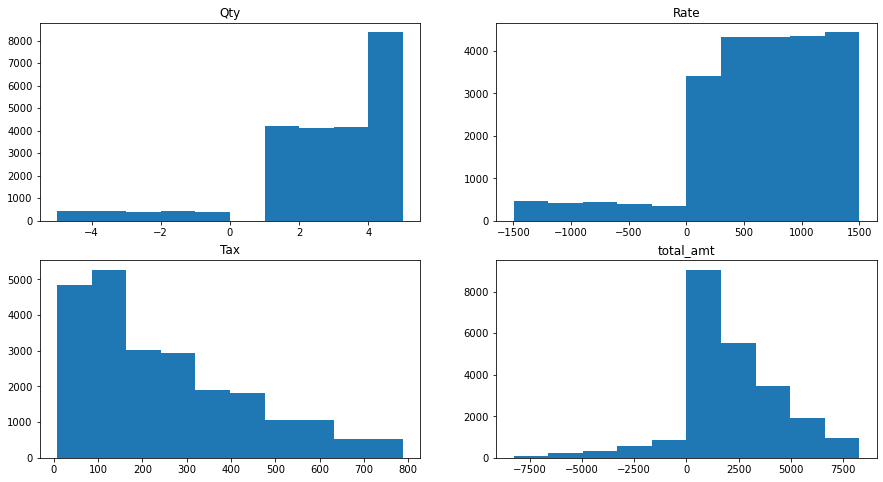

In [23]:
# Multiple histogram plots for cont variables as subplots
fig, axes = plt.subplots(2,2 , figsize=(15,8))
c=0
for i in range(0,2):
    for j in range(0,2):
        ax = axes[i][j]
        ax.hist(Customer_Final[cont_var[c]])
        ax.set_title(cont_var[c])
        c += 1

C:\Users\User\AppData\Local\Temp/ipykernel_10640/4063470220.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( x_axs, rotation=75)


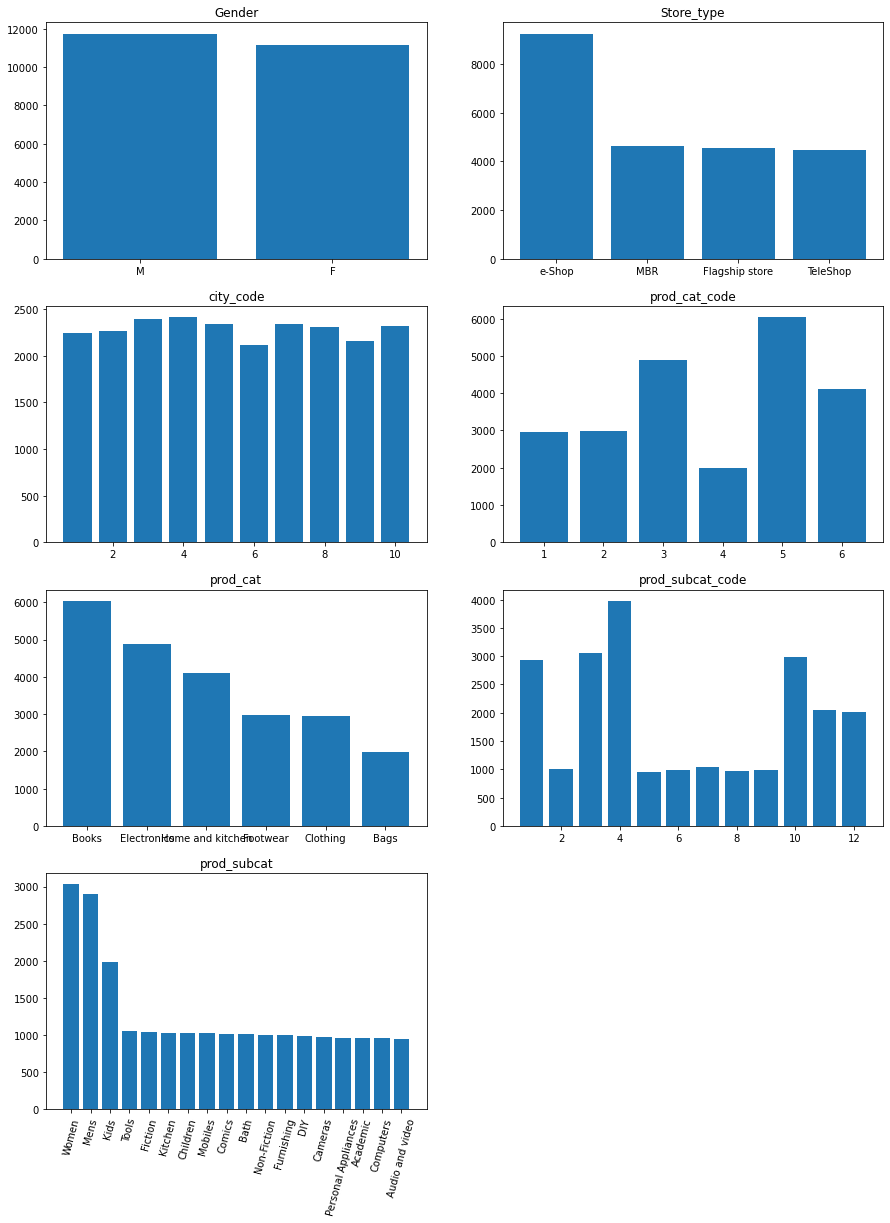

In [24]:
fig, axes = plt.subplots(4,2, figsize=(15,20))
c=0     # counter variable to get categorical variable names recursively
for i in range(0,4):
    for j in range(0,2):
        if c < len(categ_var) :          # checking if counter exceeds the number of categorical variables
            ax = axes[i][j]
            x_axs = Customer_Final.loc[:, categ_var[c]].value_counts().index  # x-axis values for freq bar plot
            ax.bar(x = x_axs ,
                   height = Customer_Final.loc[:, categ_var[c]].value_counts())
            ax.set_title(categ_var[c])
            if c==6 :                 # rotate x-axis values for prod_subcat variable
                ax.set_xticklabels( x_axs, rotation=75) 
            c += 1
            
        else :                        # removing the empty subplot box
            fig.delaxes( axes[i][j] ) 

### 4. Calculate the following information using the merged dataset:
#### a) Timeperiod of the available transaction data

In [25]:
oldest_date = Customer_Final.tran_date.min()
latest_date = Customer_Final.tran_date.max()
print('Oldest transaction date = '+ oldest_date.strftime('%d-%b-%Y') + '\n')
print('Latest transaction date = '+ latest_date.strftime('%d-%b-%Y') +'\n')
print('Timeperiod of transaction data = '+ str(latest_date - oldest_date) )

Oldest transaction date = 25-Jan-2011

Latest transaction date = 28-Feb-2014

Timeperiod of transaction data = 1130 days 00:00:00


#### b) Count of transactions where total amount of transaction was negative

In [26]:
Customer_Final.total_amt[Customer_Final.total_amt<0].count()

2059

### 5. Analyze which product categories are more popular among male vs female consumers

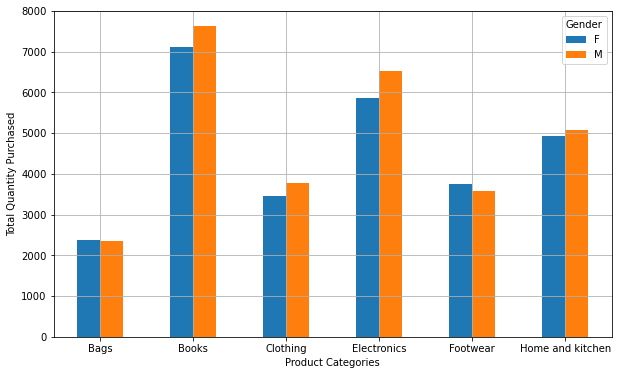

In [27]:
Customer_Final.pivot_table(index= 'prod_cat', columns= 'Gender',
                           values= 'Qty', aggfunc='sum') .plot(kind='bar', rot=0, grid=True, figsize=(10,6))
plt.ylabel('Total Quantity Purchased')
plt.xlabel('Product Categories')
plt.show()

* **`Books`** and **`Electronics`** are the most popular categories among males and females. 
* For all categories except **`Bags`** and **`Footwear`**, quantity purchased by Males is greater than Females.

### 6. Which city code has the maximum customers and what is the percentage of customer from that city?

In [28]:
# number of unique customers per city in transaction table
city_cust_count = Customer_Final.groupby('city_code').cust_id.nunique().sort_values(ascending=False)

print('City code with maximum customers :')
print(city_cust_count.head(1).index ,'\n')

print('Percentage of customers from the above city code :')
print(round( city_cust_count.max() / city_cust_count.sum() * 100 , 2 ) , '%') 

City code with maximum customers :
Float64Index([3.0], dtype='float64', name='city_code') 

Percentage of customers from the above city code :
10.47 %


### 7. Which store type sells the max products by value and by quantity?

In [29]:
print('Store type with highest sales by value:')
print( Customer_Final.groupby(by='Store_type').total_amt.sum().sort_values(ascending=False).head(1) , '\n')
print('Store type with highest sales by quantity:')
print( Customer_Final.groupby(by='Store_type').Qty.sum().sort_values(ascending=False).head(1) )

Store type with highest sales by value:
Store_type
e-Shop    19940262.03
Name: total_amt, dtype: float64 

Store type with highest sales by quantity:
Store_type
e-Shop    22902
Name: Qty, dtype: int64


### 8. What was the total amount earned from 'Electronics' and 'Clothing' categories from 'Flagship' stores?

In [30]:
prod_cat_sales = Customer_Final.loc[Customer_Final.Store_type == 'Flagship store', :] \
                        .groupby(by='prod_cat').total_amt.sum()
print('Total amount earned from both categories :' , '\n', prod_cat_sales[['Electronics','Clothing']].sum())
print('\n')
print('Category wise total amount earned :','\n', prod_cat_sales[['Electronics','Clothing']])

Total amount earned from both categories : 
 3428316.645


Category wise total amount earned : 
 prod_cat
Electronics    2231824.855
Clothing       1196491.790
Name: total_amt, dtype: float64


### 9. What is the total amount earned from 'Male' customers under 'Electronics' category

In [31]:
Customer_Final.loc[(Customer_Final.Gender == 'M') & (Customer_Final.prod_cat == 'Electronics') , 'total_amt'].sum()

5744917.1

### 10. How many customers have more than 10 unique transactions after removing all transactions with negative amounts

In [32]:
cust_trans = Customer_Final.loc[Customer_Final.total_amt > 0 , :].groupby('cust_id').transaction_id.nunique()
print( 'List of customers with number of transactions > 10 :', '\n' , cust_trans[cust_trans>10] )
print( '\n', 'Number of customers with number of transactions > 10 :' , cust_trans[cust_trans>10].count() )

List of customers with number of transactions > 10 : 
 cust_id
266794    11
270535    11
270803    11
272741    11
273014    11
274227    11
Name: transaction_id, dtype: int64

 Number of customers with number of transactions > 10 : 6


### 11. For all customers aged between 25-35, find out
#### a) What was the total amount spent for "Electronics" and "Books" categories

In [33]:
# Calculating age of Customer as on last transaction date
age = (Customer_Final.groupby(by='cust_id').tran_date.max() - Customer_Final.groupby('cust_id').DOB.max()).dt.days / 365.25
age = age.reset_index().rename(columns={0:'age'})

# Merging the age of customers with the Customer_Final dataframe
Customer_Final = pd.merge(left= Customer_Final , right= age, left_on='cust_id', right_on='cust_id', how='left')

Customer_Final.loc[(Customer_Final.prod_cat.isin(['Electronics','Books'])) &
                   (Customer_Final.age >= 25) & (Customer_Final.age <= 35) , 'total_amt'].sum().round(2)

10336211.99

#### b) What was the total amount spent by these customers between 1st Jan 2014 to 1st Mar 2014

In [34]:
Customer_Final.loc[(Customer_Final.tran_date >= pd.to_datetime('1-1-2014', format='%d-%m-%Y')) & 
                   (Customer_Final.tran_date <= pd.to_datetime('1-3-2014', format='%d-%m-%Y')) &
                   (Customer_Final.age >= 25) &
                   (Customer_Final.age <= 35) , 'total_amt'].sum().round(2)

1004582.02